# Algorytmy macierzowe - faktoryzacja Cholesky'ego

*Wykonanie: Adrianna Łysik, Maksymilian Wojnar*

# Problem nr 6

**Proszę napisać procedurę `[S]=Schur_Complement(A,n,m)` gdzie $A$ to macierz wejściowa, $n$ to rozmiar tej macierzy, $m$ to rozmiar podmacierzy (tzw. dopełnienia Schura), wykorzystując faktoryzację Cholesky'ego $LDL^T$**

Treść zadania:

1. Dla macierzy IGA `riga=0, pxx=2, rxx=0`, proszę narysować następujący wykres:
    - oś pozioma: rozmiar macierzy n dla liczby przedziałów `nxx=2,3,4,...`,
    - oś pionowa: czas [s],
    - proszę narysować:
     + wykres czasu obliczeń dopełnień Schura o rozmiarze `n/2`,
     + wykres czasu obliczeń dopełnień Schura o rozmiarze `n/4`,
     + ... takie podziały, jakie mają sens do rozmiaru `1`.

2. Dla macierzy FEM `riga=1, pxx=2, rxx=0`, proszę narysować następujący wykres:
     - oś pozioma: rozmiar macierzy n dla liczby przedziałów `nxx=2,3,4,...`,
     - oś pionowa: czas [s],
     - proszę narysować:
      + wykres czasu obliczeń dopełnień Schura o rozmiarze `n/2`,
      + wykres czasu obliczeń dopełnień Schura o rozmiarze `n/4`,
      + ... takie rozmiary, jakie mają sens do rozmiaru `1`.

3. Jaki jest koszt obliczeniowy i pamięciowy (flopsy i memopsy) zaimplementowanego algorytmu?
 

**Importy, ustawienia wyświetlania oraz wczytanie macierzy:**

In [4]:
from time import perf_counter
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (15, 10)

**Implementacja dopełnienia Schura wykorzystująca faktoryzację Cholesky'ego $LDL^T$:**

In [5]:
def Schur_complement(A, n, m):
    for k in range(n - m):
        if np.abs(A[k, k]) < 1e-10:
            raise ValueError('Diagonal value too small')

        vk = A[k + 1:, k].copy() 
        A[k + 1:, k] /= A[k, k]

        for j in range(k + 1, n):
            A[j:, j] -= A[j:, k] * vk[j - (k + 1)]

    return A

Biorąc pod uwagę własności numpy, w powyższej implementacji można było pominąc operację transpozycji. 

**Funkcja do testowania czasu działania faktoryzacji Cholesky'ego:**

In [6]:
def time_test(matrices, fractions):
    results = {f: np.zeros(len(matrices)) for f in fractions}
    matrices_sizes = np.zeros(len(matrices))
              
    for i, matrix in enumerate(matrices):
        n = len(matrix)
        matrices_sizes[i] = n

        for complement_fraction in fractions:
            matrix_copy = matrix.copy()
            m = n // complement_fraction

            start = perf_counter()
            Schur_complement(matrix_copy, n, m)
            end = perf_counter()

            results[complement_fraction][i] = end - start
            
    return results, matrices_sizes

# Ad 1 - IGA

**Wczytywanie macierzy**

In [7]:
iga_matrices = []

for filename in glob('.\IGA\matrix_*.csv'):
    iga_matrices.append(pd.read_csv(filename, header=None, index_col=None).to_numpy())

iga_matrices.sort(key=lambda x: len(x))

Największa macierz IGA (n = 1024):

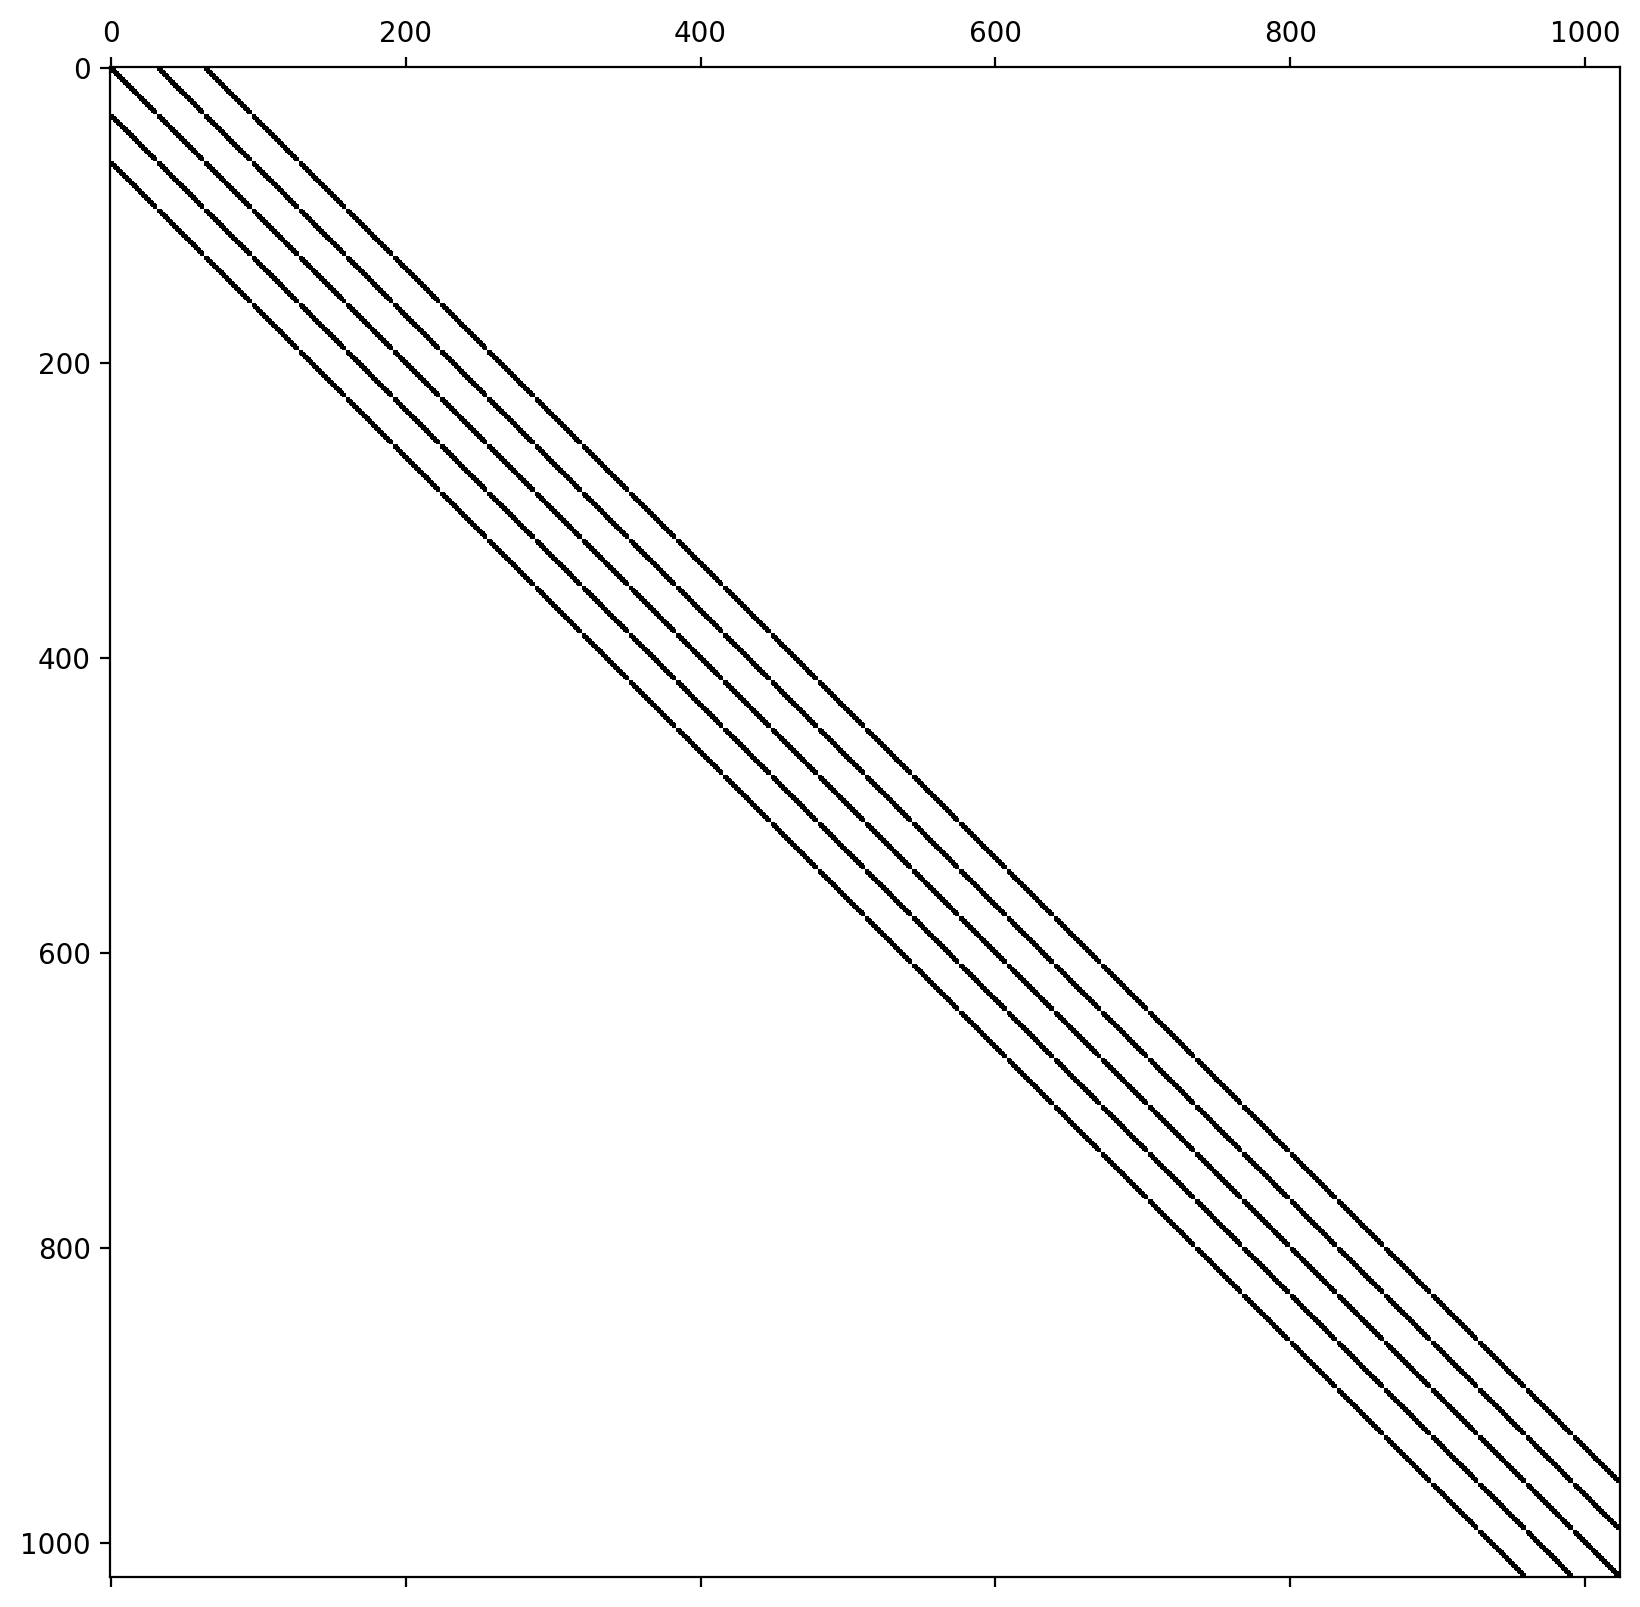

In [8]:
plt.spy(iga_matrices[-1])
plt.show()

**Wykres zależności czasu działania funkcji od rozmiaru macierzy i dopełnienia Schura:**

Funkcję `Schur_complement` badamy dla parametru
$m = n / 2,  n / 4, n / 8, n / 16, n / 32 $ 

In [24]:
fractions = [2, 4, 8, 16, 32]
results, matrices_sizes = time_test(iga_matrices, fractions)

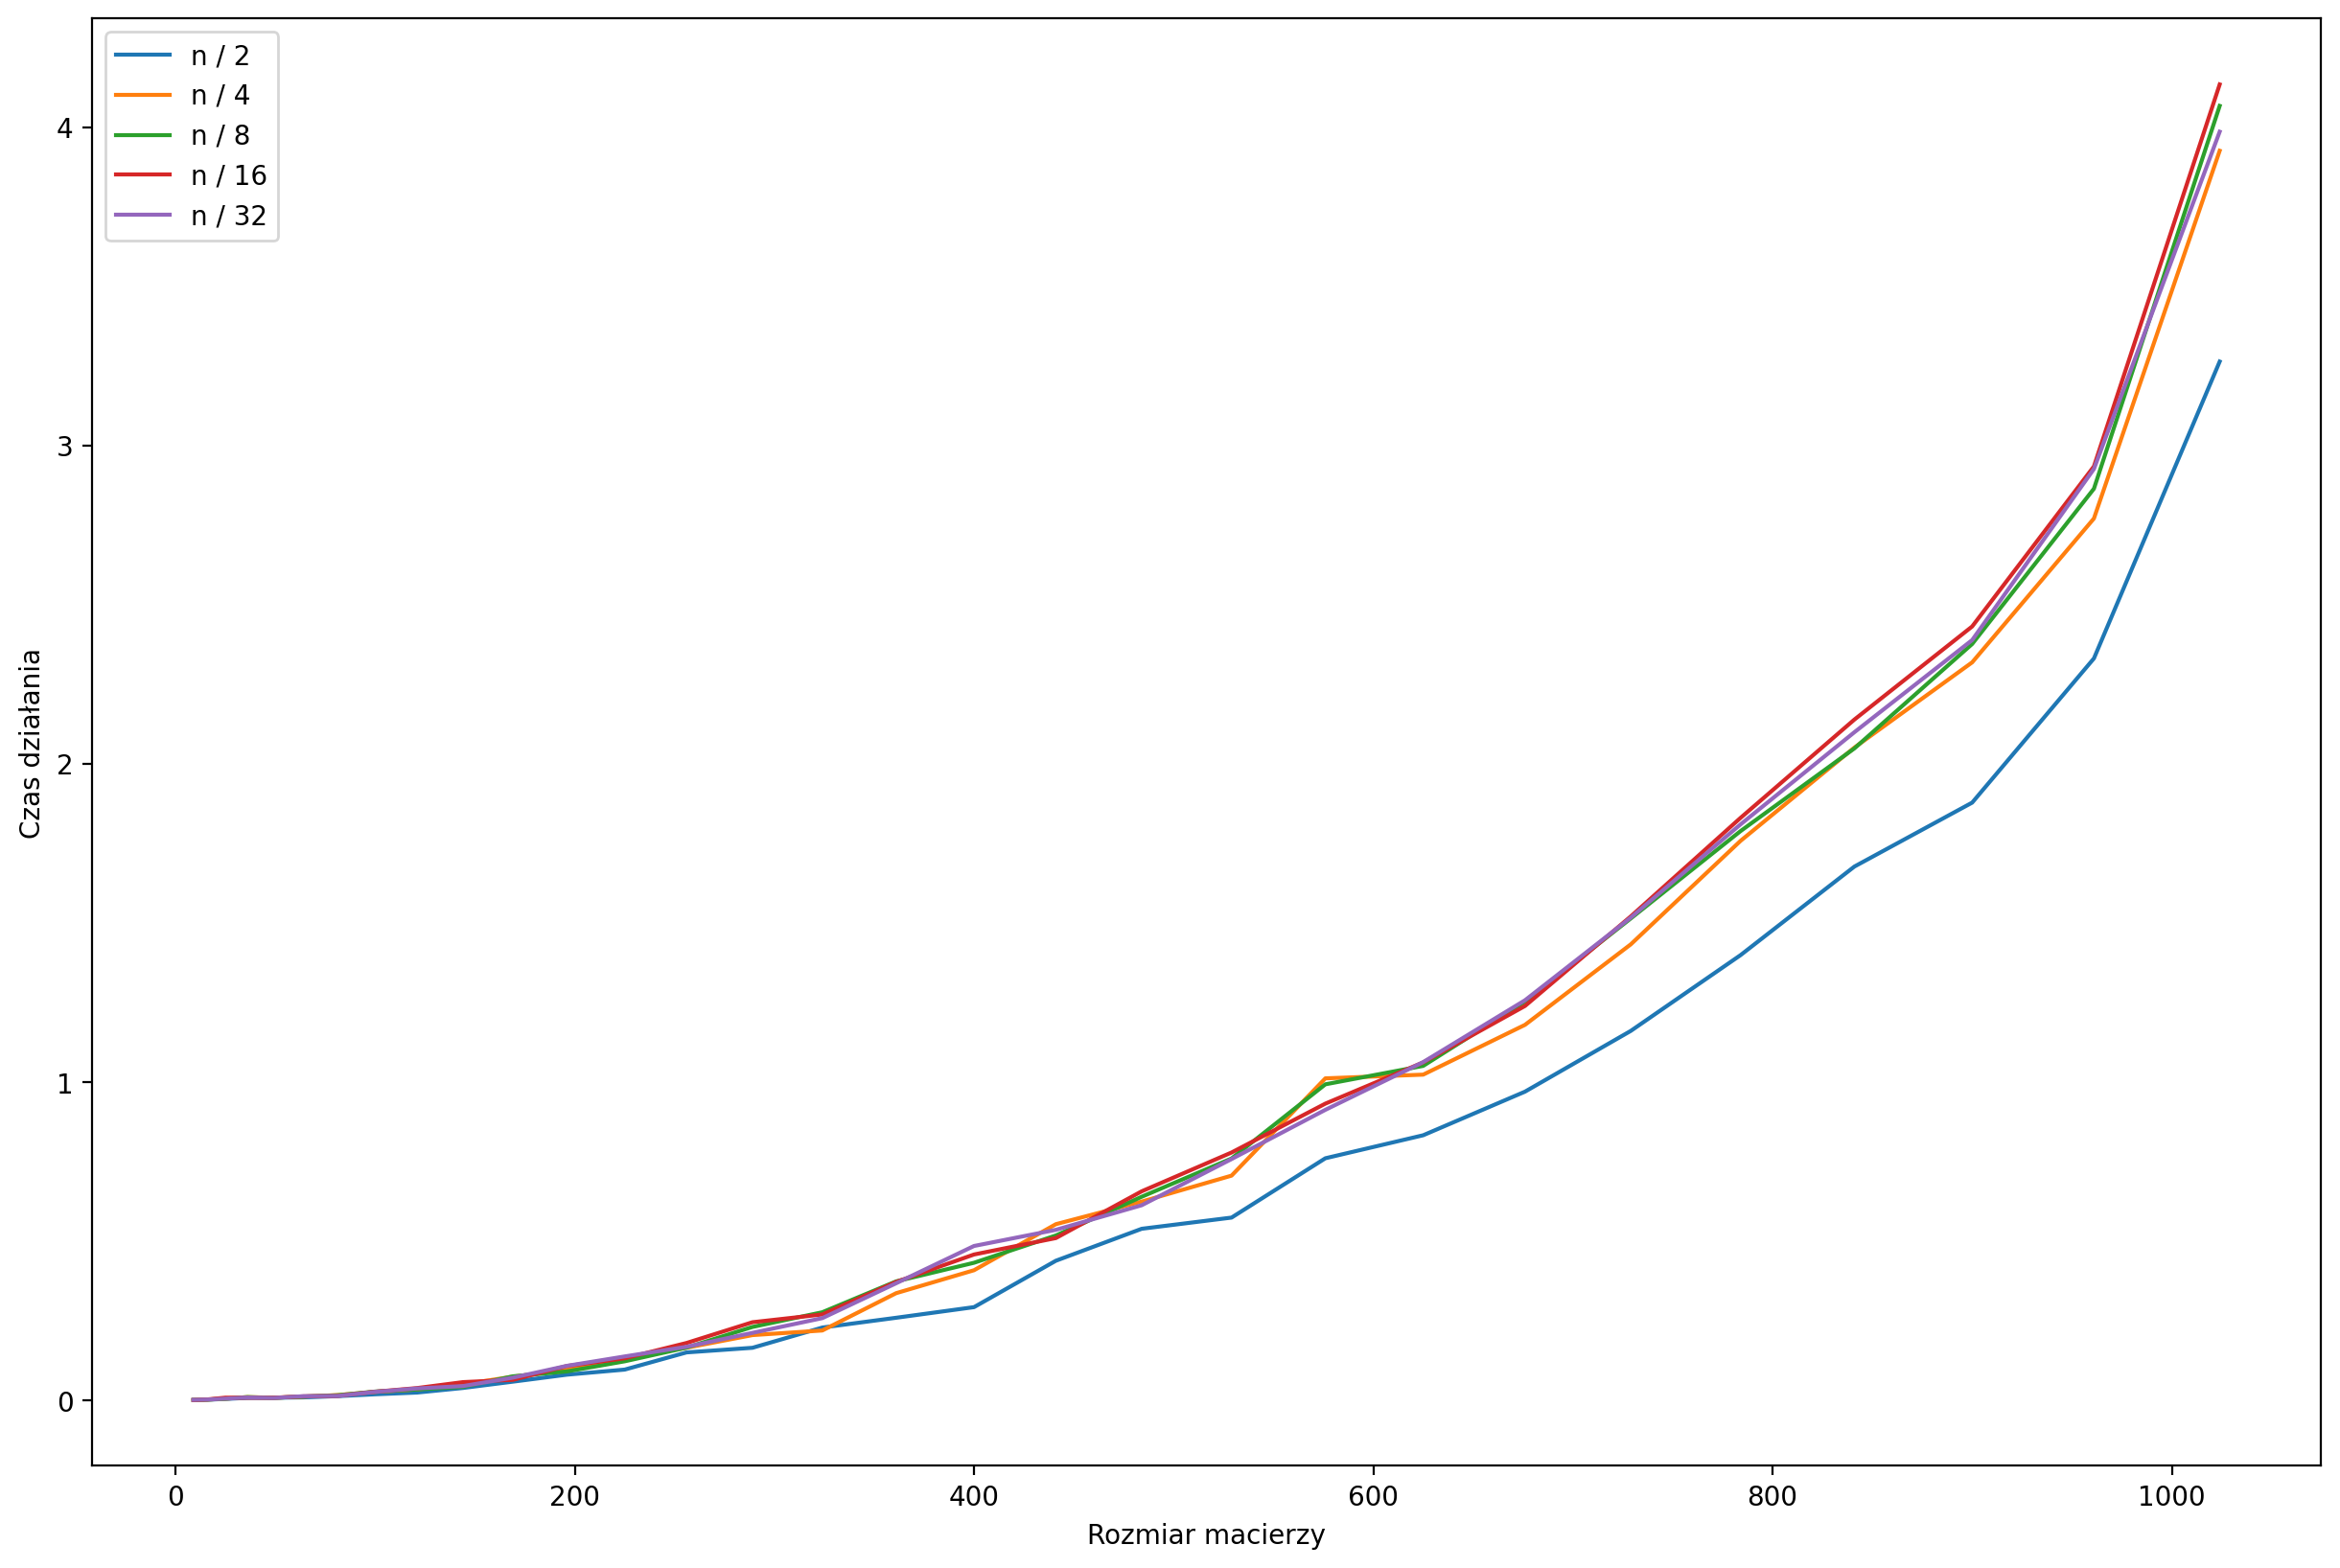

In [25]:
for complement_fraction, times in results.items():
    plt.plot(matrices_sizes, times, label=f'n / {complement_fraction}')

plt.legend()
plt.ylabel('Czas działania')
plt.xlabel('Rozmiar macierzy')
plt.show()

Czas dla największej macierzy (n = 1024):

In [26]:
df = pd.DataFrame([[f'n / {c_f}', times[-1]] for c_f, times in results.items()])
df.columns = 'Rozmiar dopełnienia Schura', 'Czas działania [s]'
df

,Rozmiar dopełnienia Schura,Czas działania [s]
0,n / 2,3.263438
1,n / 4,3.925734
2,n / 8,4.066653
3,n / 16,4.134096
4,n / 32,3.985552


In [27]:
def draw_ops(label, results, matrices_sizes, ops_func):
    for complement_fraction, times in results.items():
        float_ops = ops_func(matrices_sizes, matrices_sizes // complement_fraction)
        plt.plot(matrices_sizes, float_ops / times, label=f'n / {complement_fraction}')

    plt.legend()
    plt.ylabel(label)
    plt.xlabel('Rozmiar macierzy')
    plt.show()

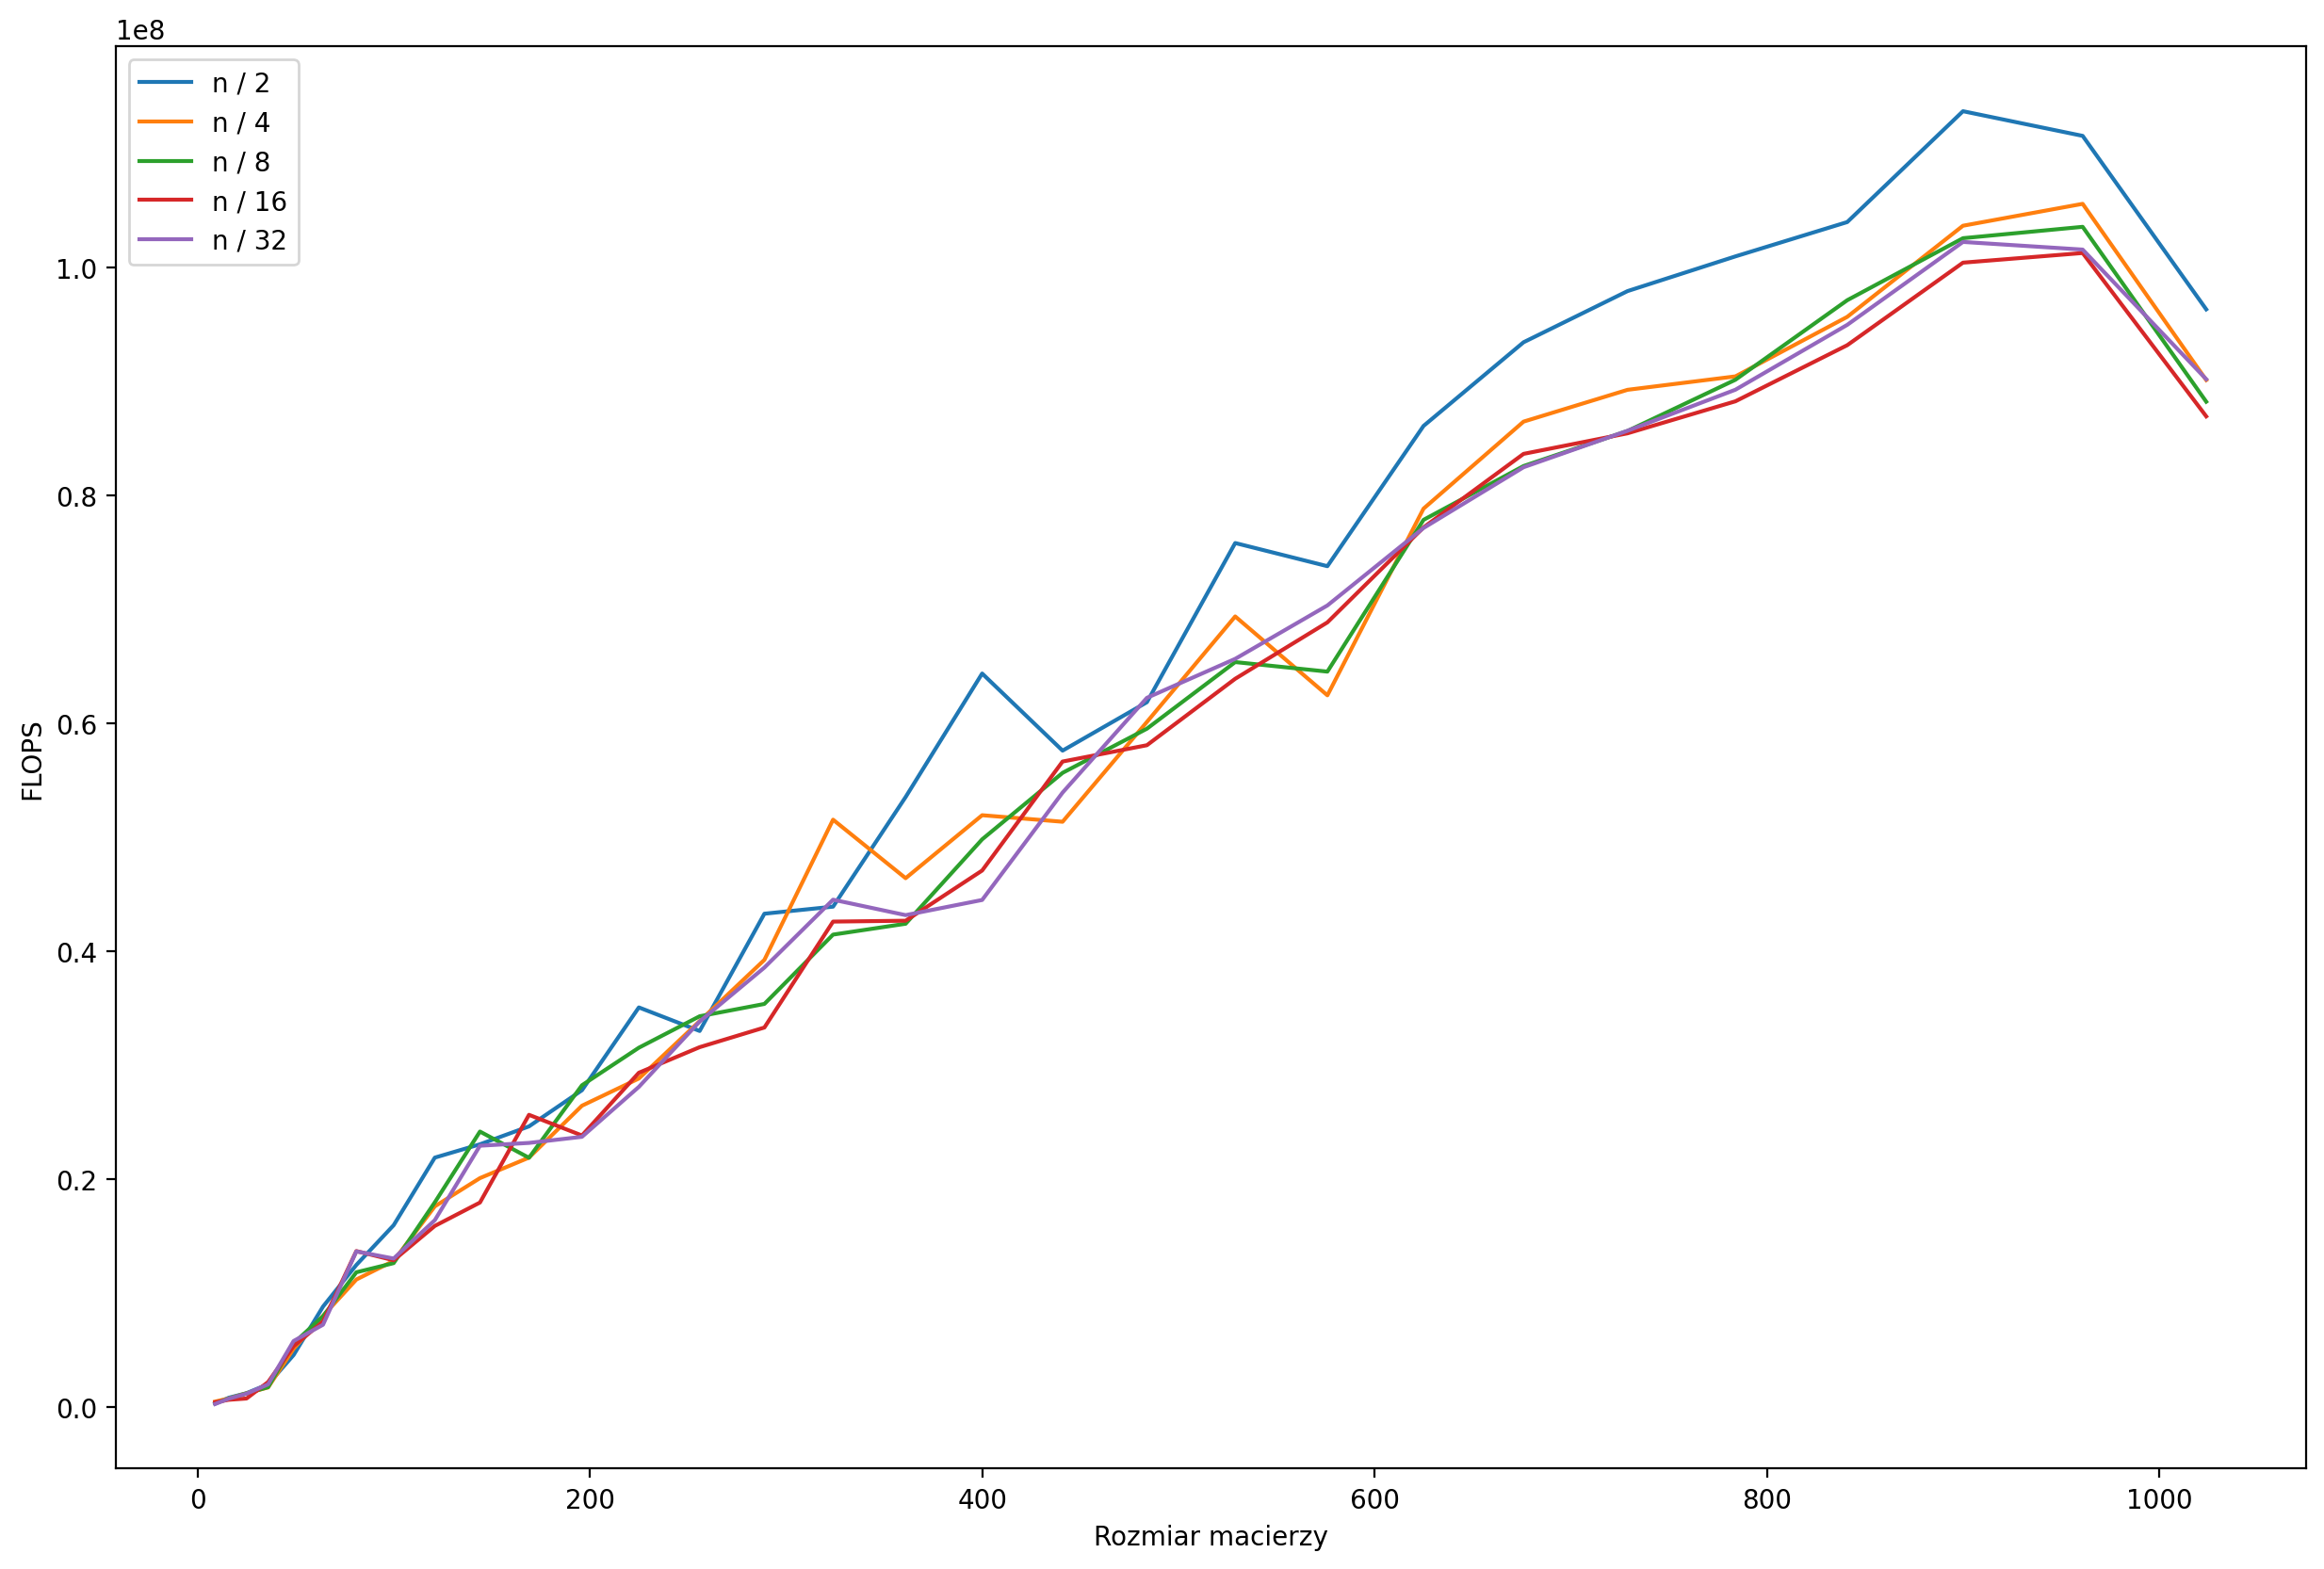

In [28]:
draw_ops('FLOPS', results, matrices_sizes, 
        lambda n, m: 1 / 3 * (n ** 3 - m ** 3) + 3 / 2 * (n ** 2 - m ** 2) - 5 / 6 * (n - m))

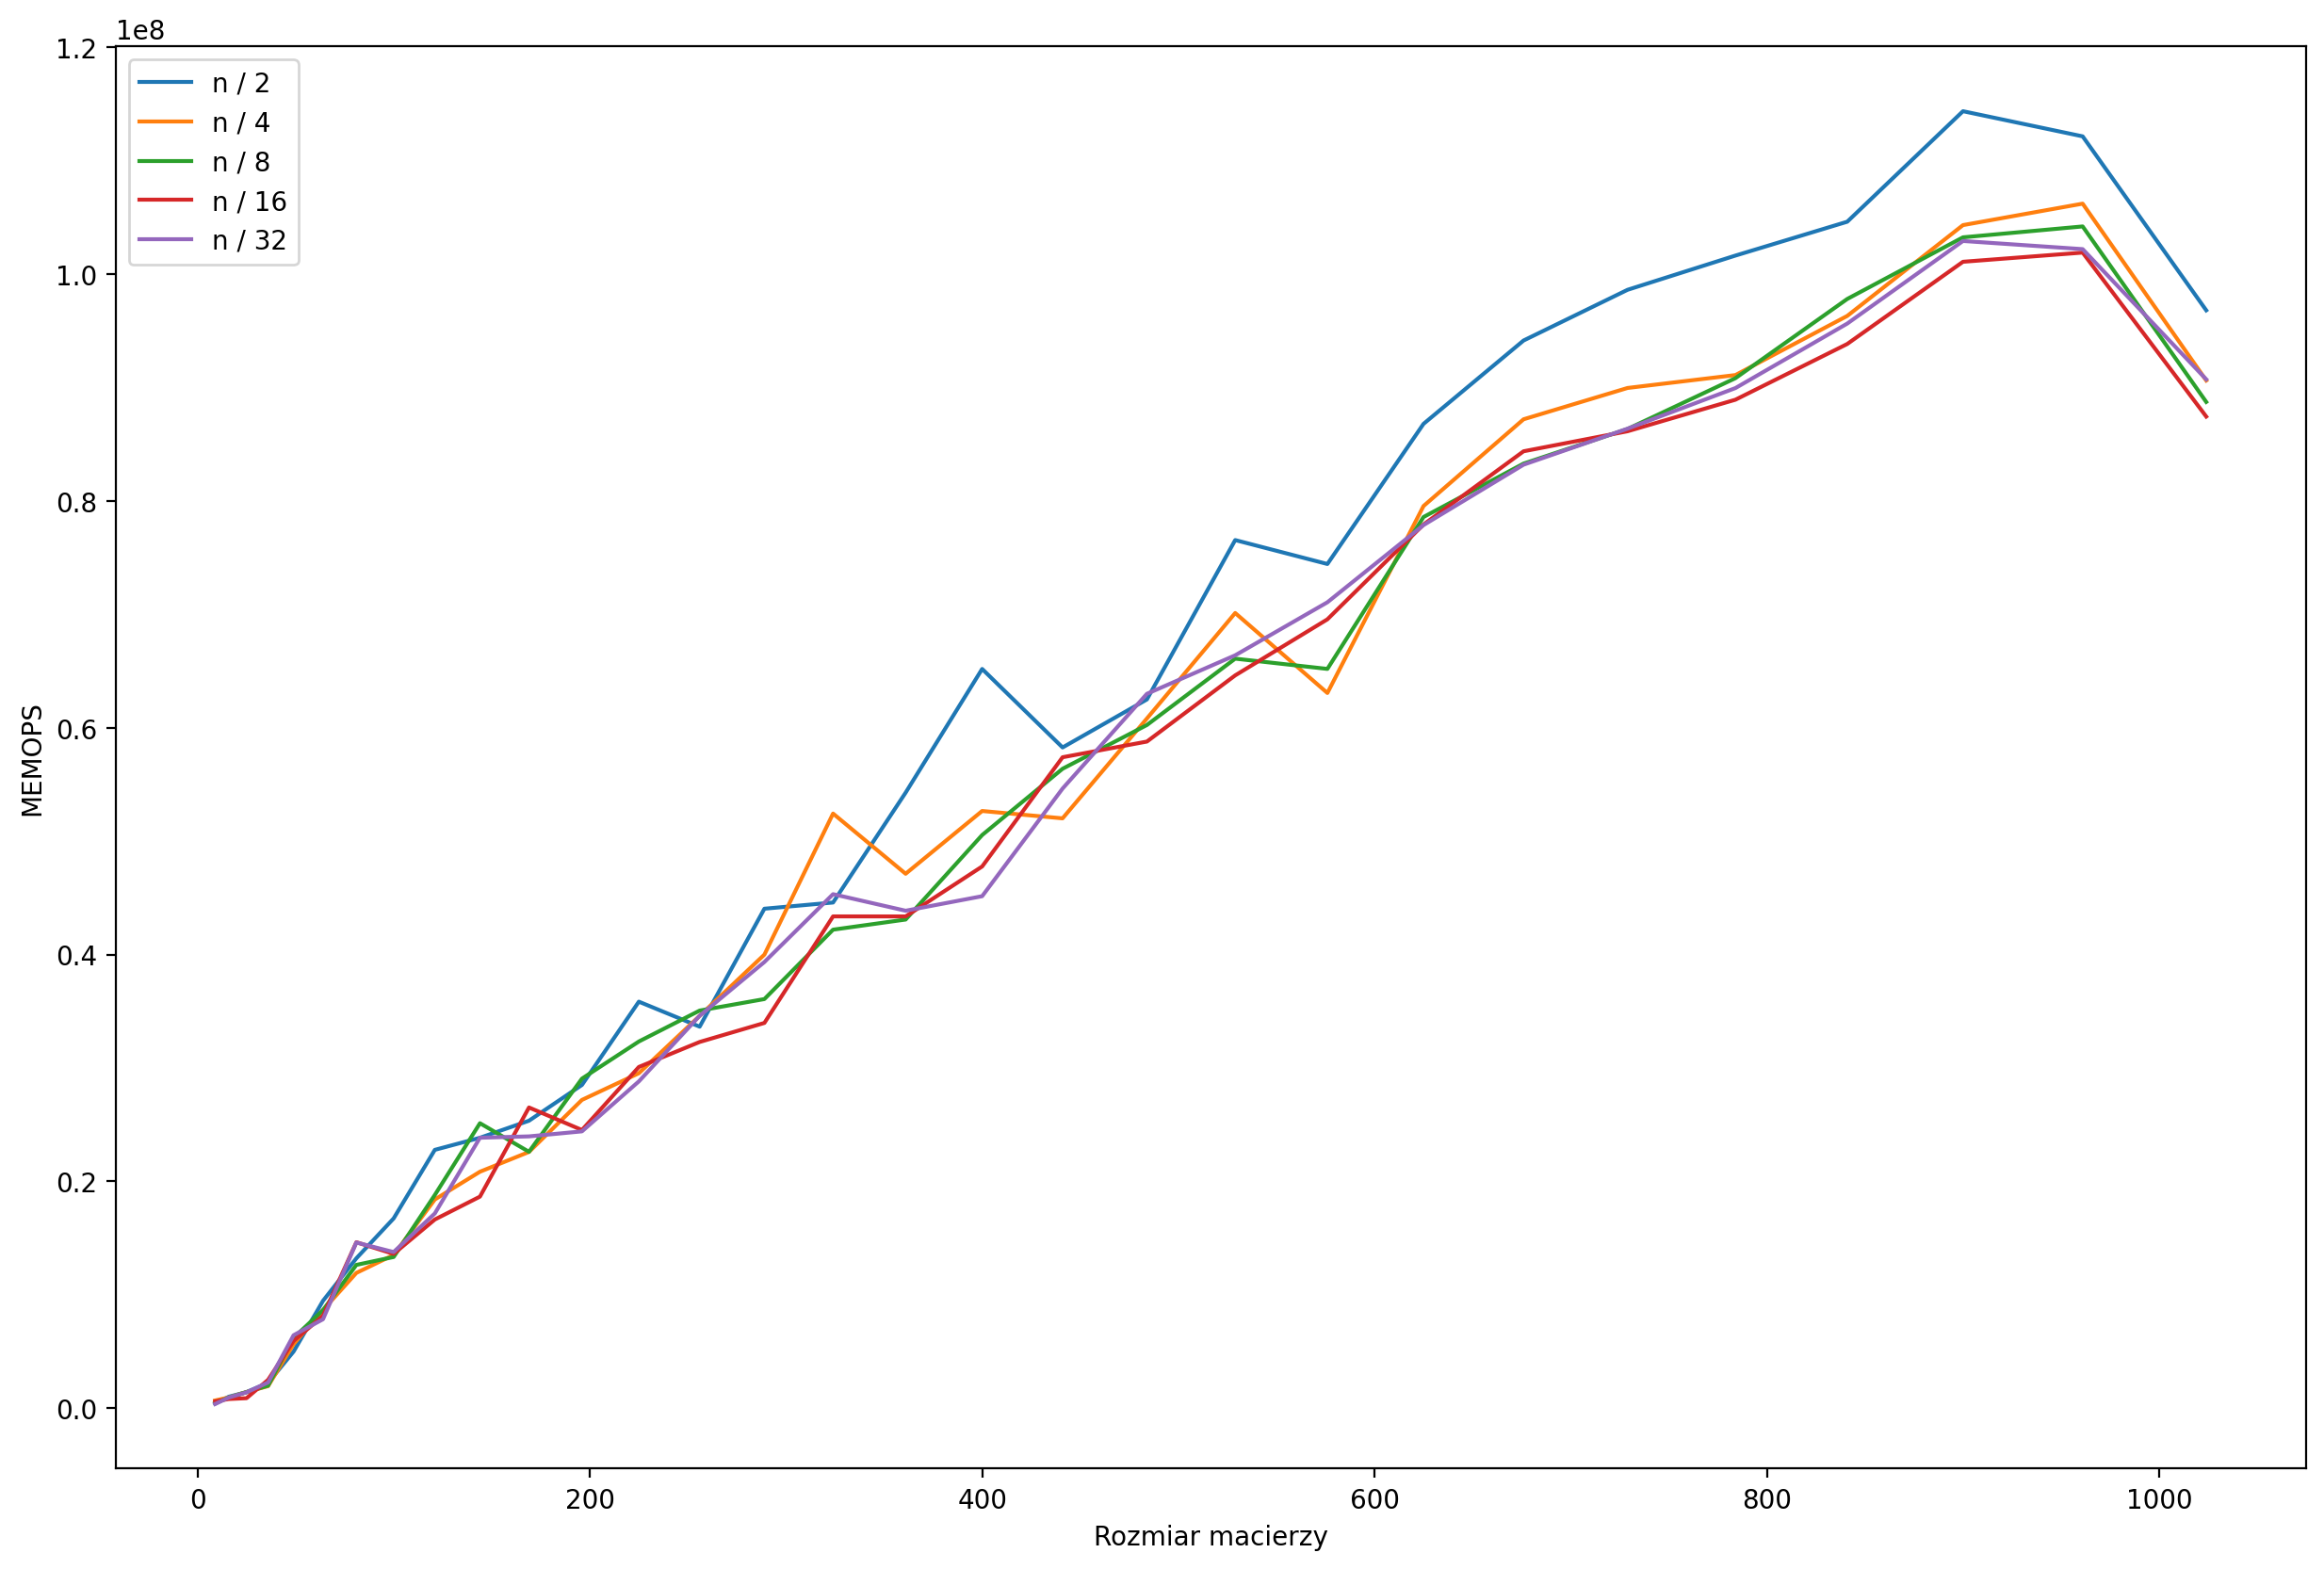

In [29]:
draw_ops('MEMOPS', results, matrices_sizes, 
        lambda n, m: 1 / 3 * (n ** 3 - m ** 3) + 7 / 2 * (n ** 2 - m ** 2) + 7 / 6 * (n - m))

# Ad 2 - FEM

**Wczytywanie macierzy**

In [17]:
fem_matrices = []

for filename in glob('.\FEM\matrix_*.csv'):
    fem_matrices.append(pd.read_csv(filename, header=None, index_col=None).to_numpy())

fem_matrices.sort(key=lambda x: len(x))

Największa macierz FEM (n = 1681):

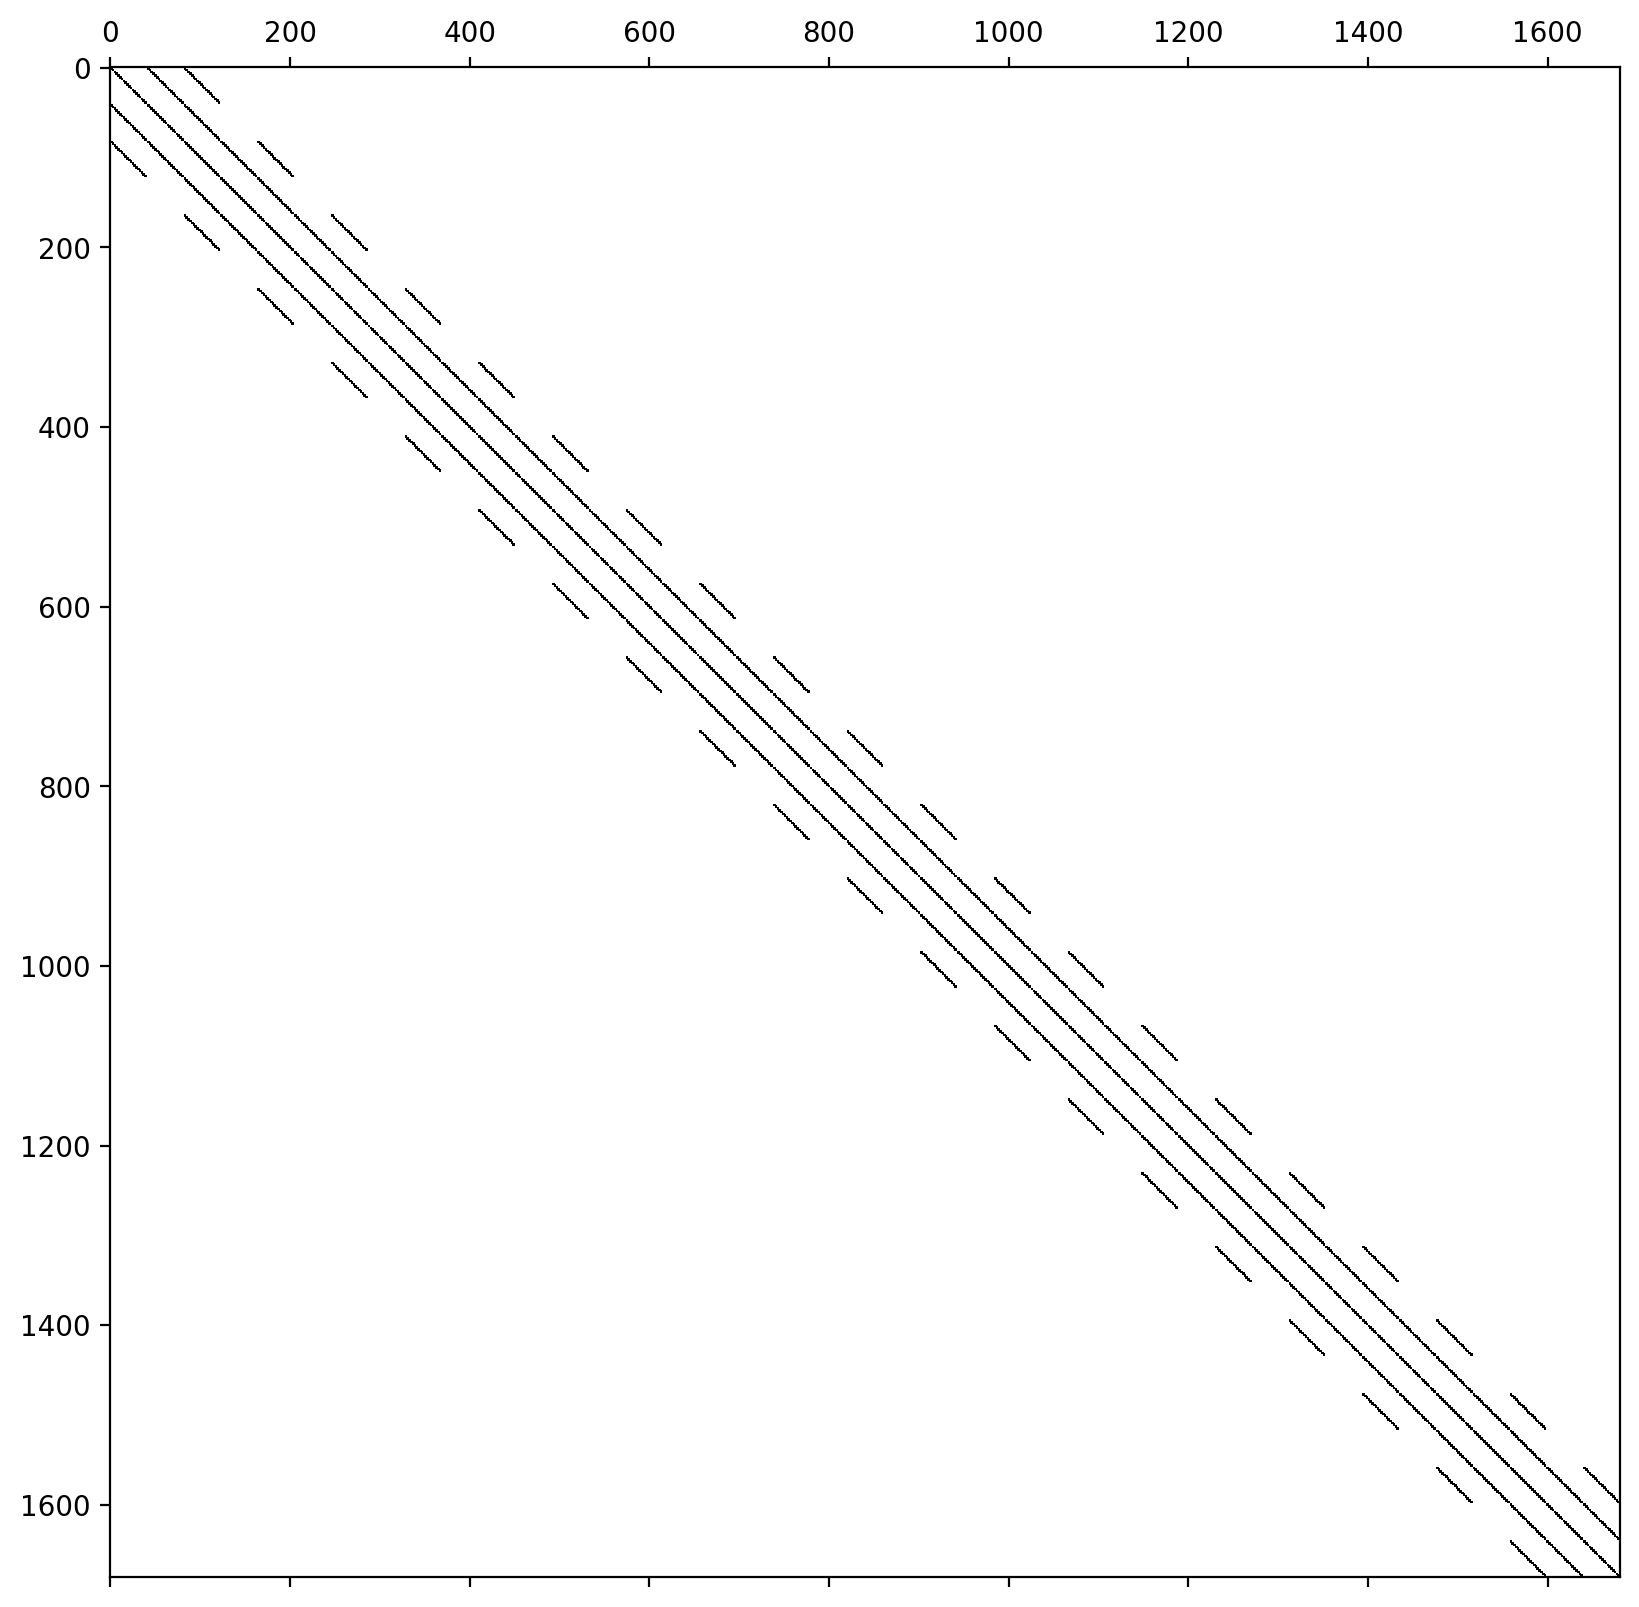

In [18]:
plt.spy(fem_matrices[-1])
plt.show()

**Wykres zależności czasu działania funkcji od rozmiaru macierzy i dopełnienia Schura:**

Funkcję `Schur_complement` badamy dla parametru
$m = n / 2,  n / 4, n / 8, n / 16, n / 32 $ 

In [30]:
results, matrices_sizes = time_test(fem_matrices, fractions) 

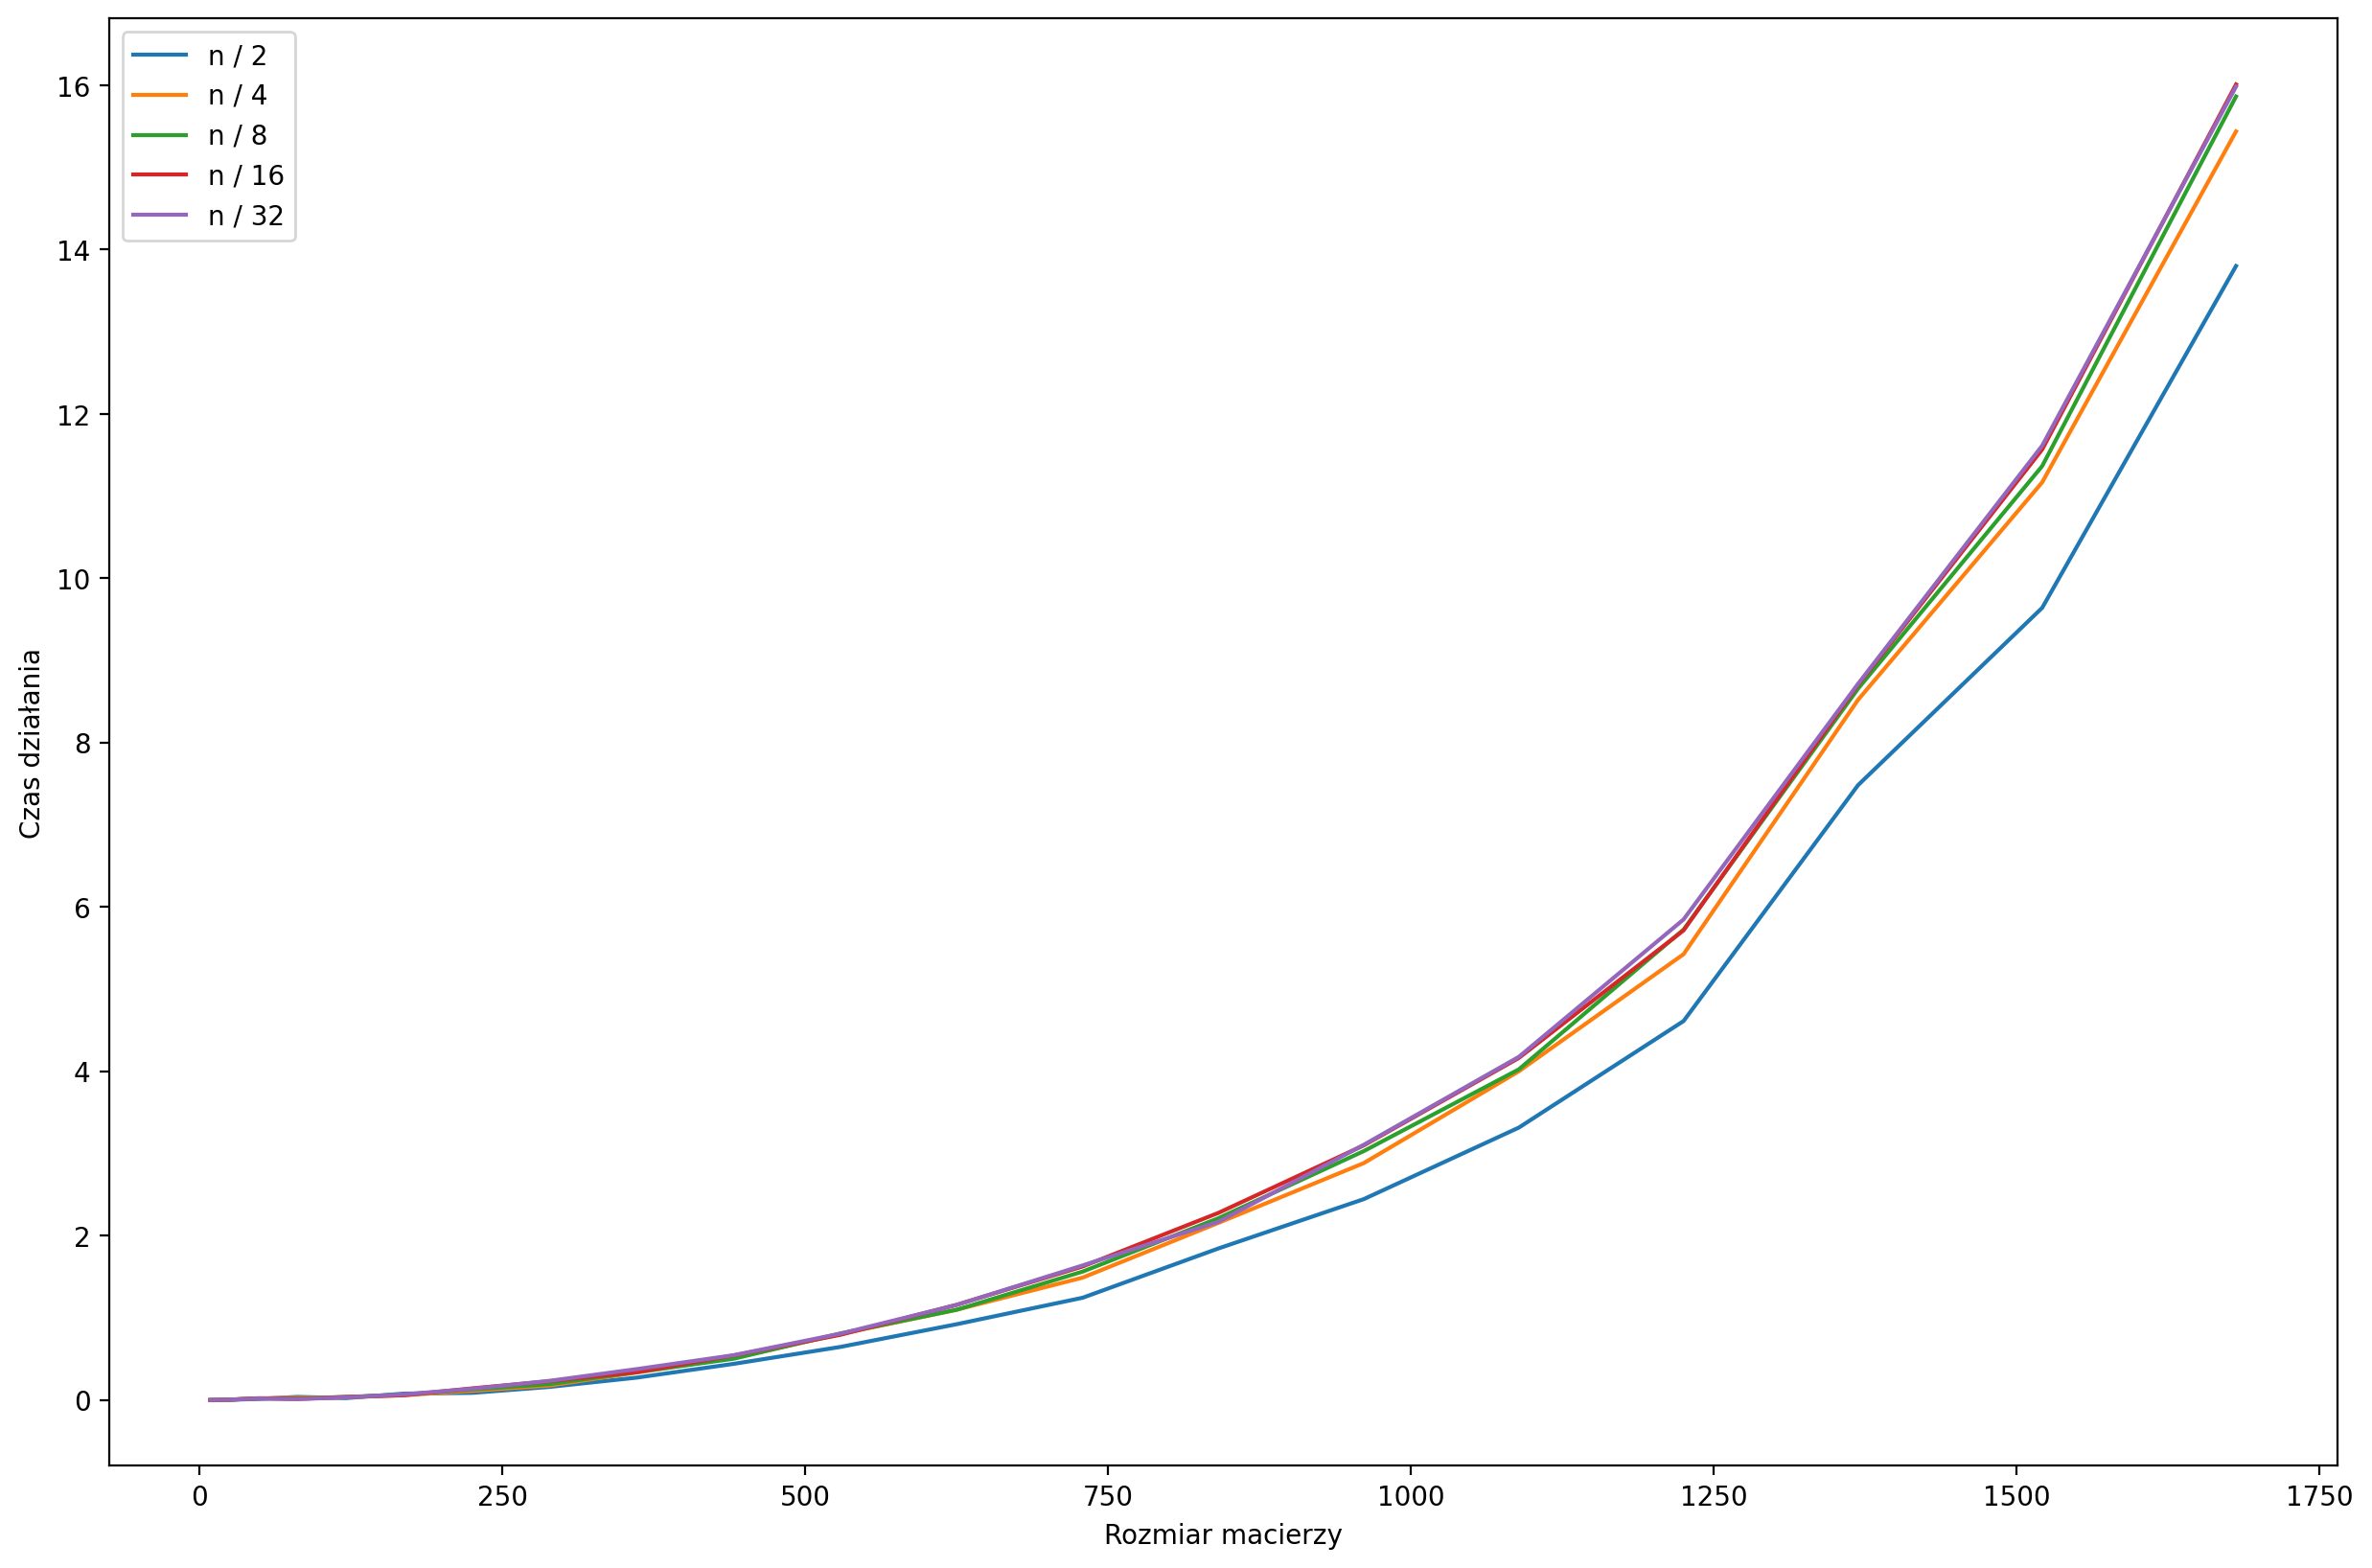

In [31]:
for complement_fraction, times in results.items():
    plt.plot(matrices_sizes, times, label=f'n / {complement_fraction}')

plt.legend()
plt.ylabel('Czas działania')
plt.xlabel('Rozmiar macierzy')
plt.show()

Czas dla macierzy (n = 1089):

In [38]:
df = pd.DataFrame([[f'n / {c_f}', times[-5]] for c_f, times in results.items()]) #Wynik czasu dla maciezry wielkosci IGA
df.columns = 'Rozmiar dopełnienia Schura', 'Czas działania [s]'
df

,Rozmiar dopełnienia Schura,Czas działania [s]
0,n / 2,3.316330
1,n / 4,4.001526
2,n / 8,4.025014
3,n / 16,4.163792
4,n / 32,4.177045


Czas dla największej macierzy (n = 1681):

In [40]:
df = pd.DataFrame([[f'n / {c_f}', times[-1]] for c_f, times in results.items()]) #Wynik czasu dla maciezry wielkosci IGA
df.columns = 'Rozmiar dopełnienia Schura', 'Czas działania [s]'
df

,Rozmiar dopełnienia Schura,Czas działania [s]
0,n / 2,13.800729
1,n / 4,15.438848
2,n / 8,15.863773
3,n / 16,16.010661
4,n / 32,15.984704


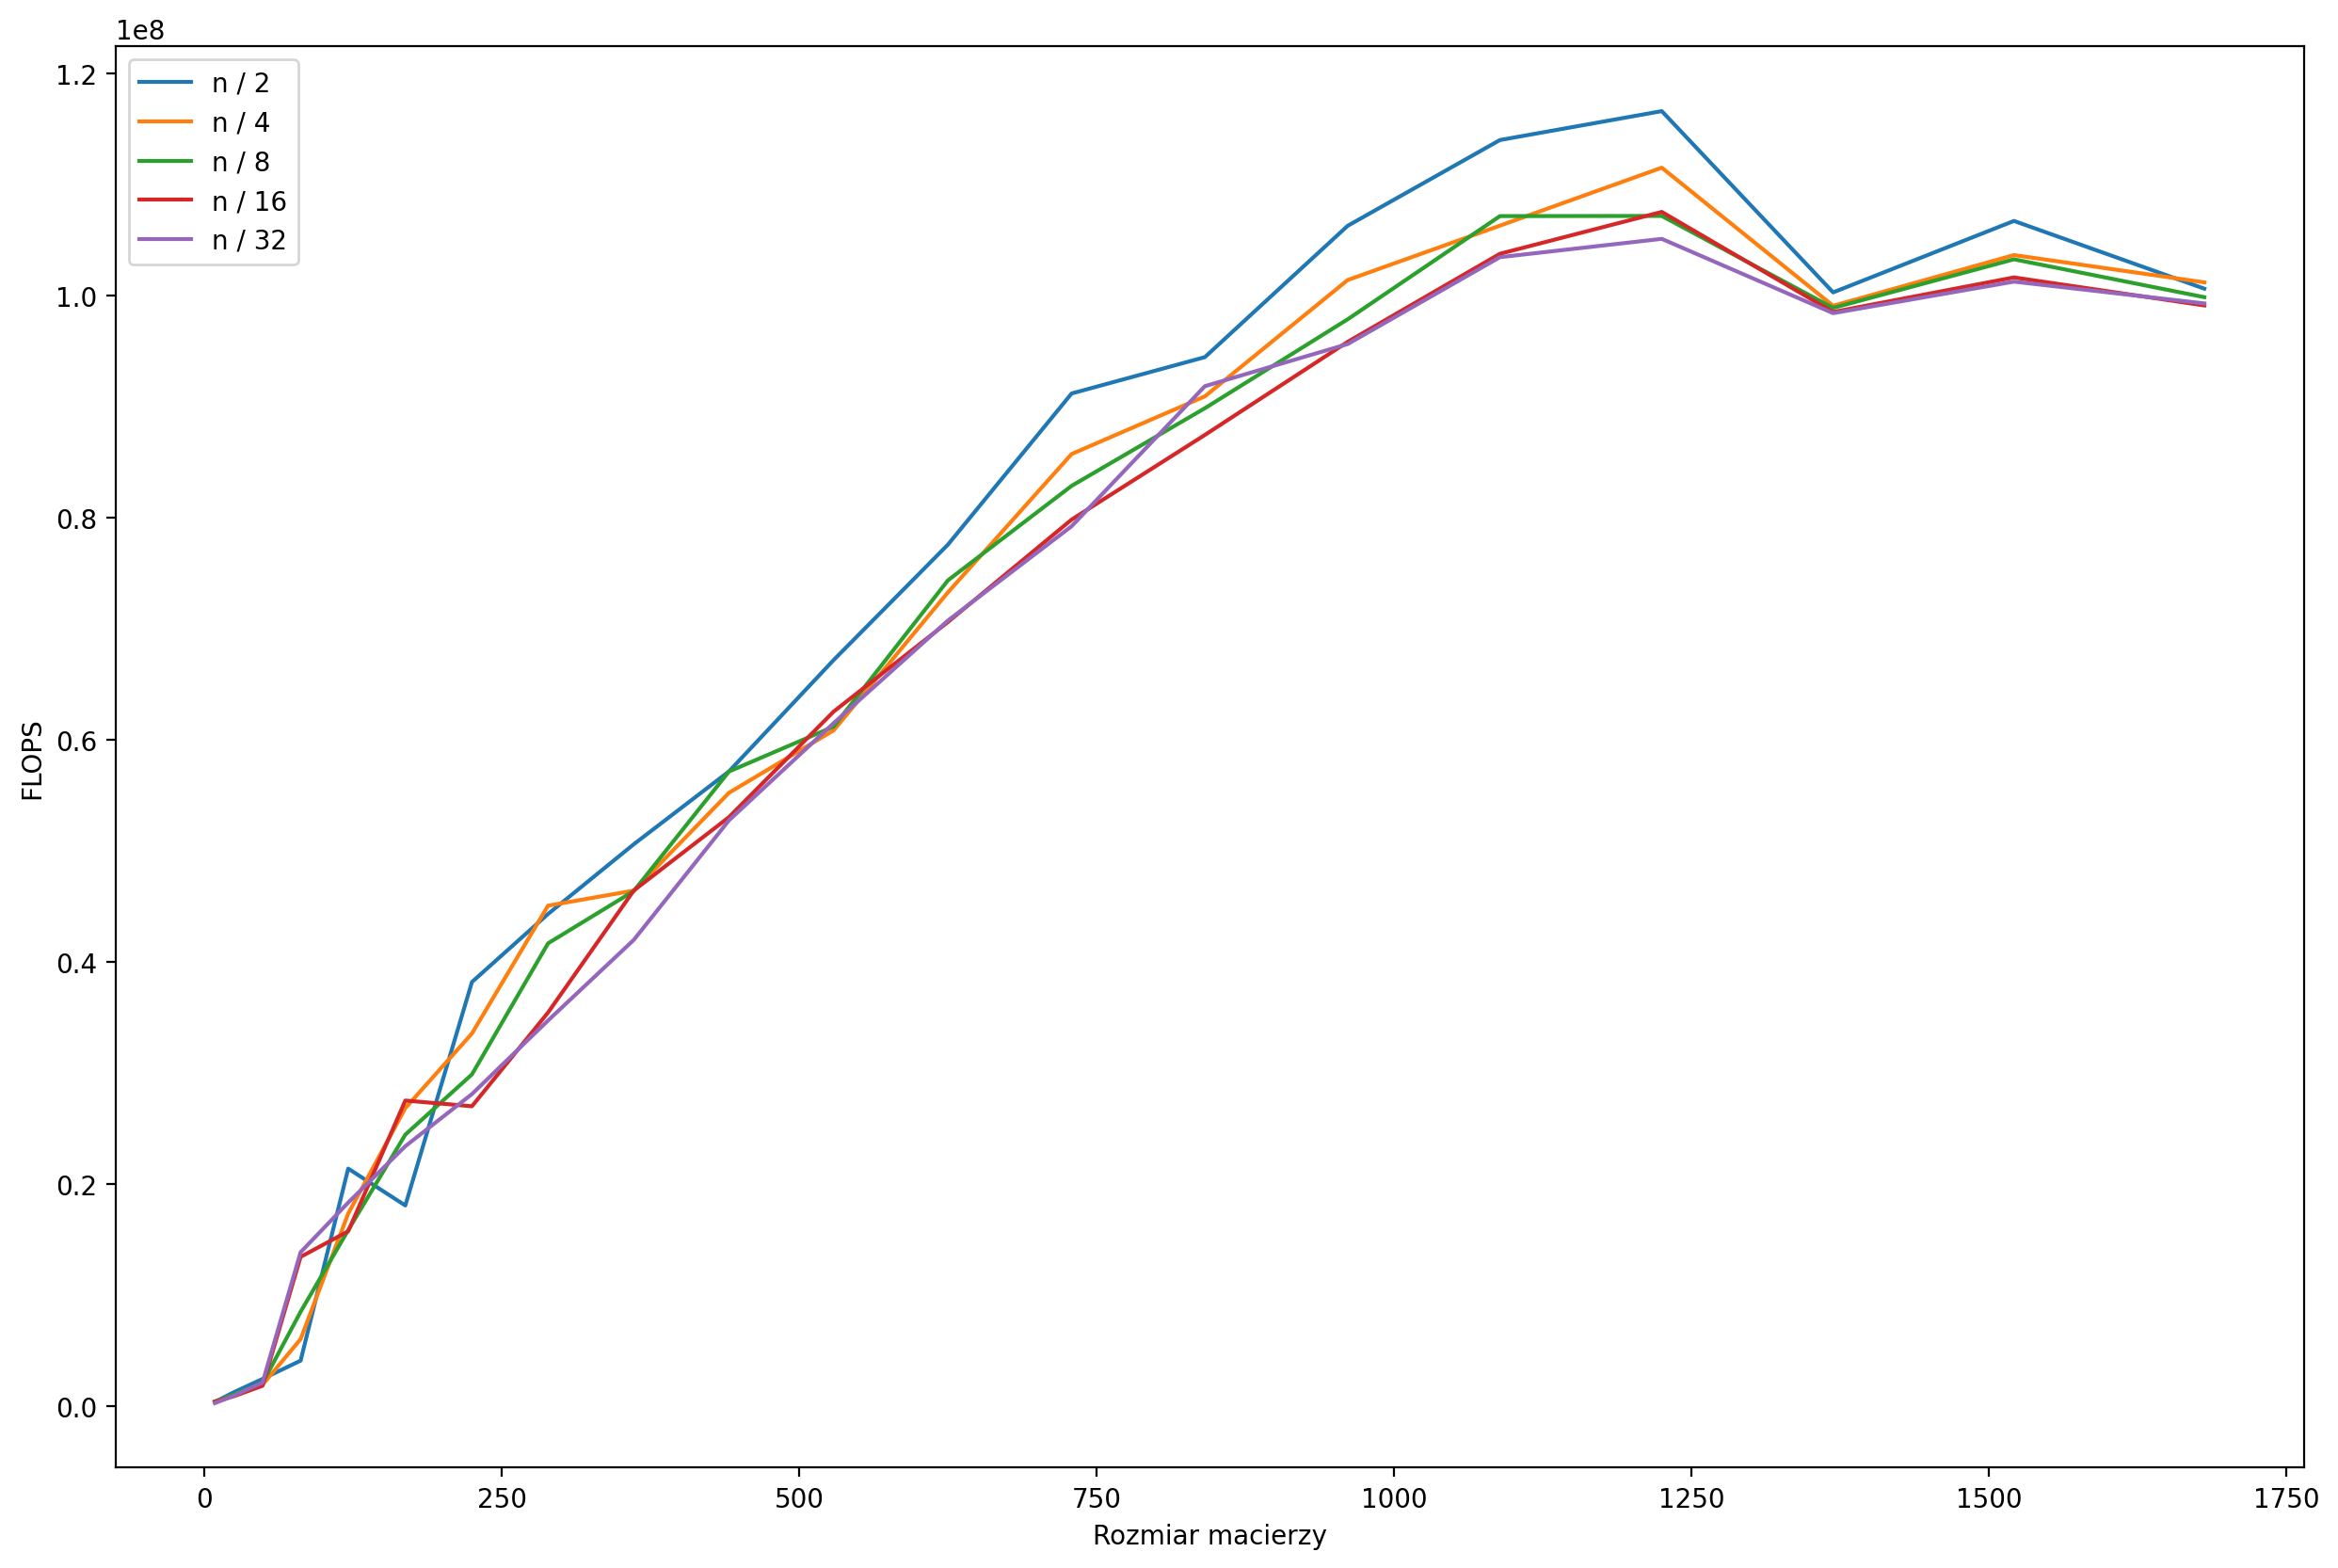

In [34]:
draw_ops('FLOPS', results, matrices_sizes, 
        lambda n, m: 1 / 3 * (n ** 3 - m ** 3) + 3 / 2 * (n ** 2 - m ** 2) - 5 / 6 * (n - m))

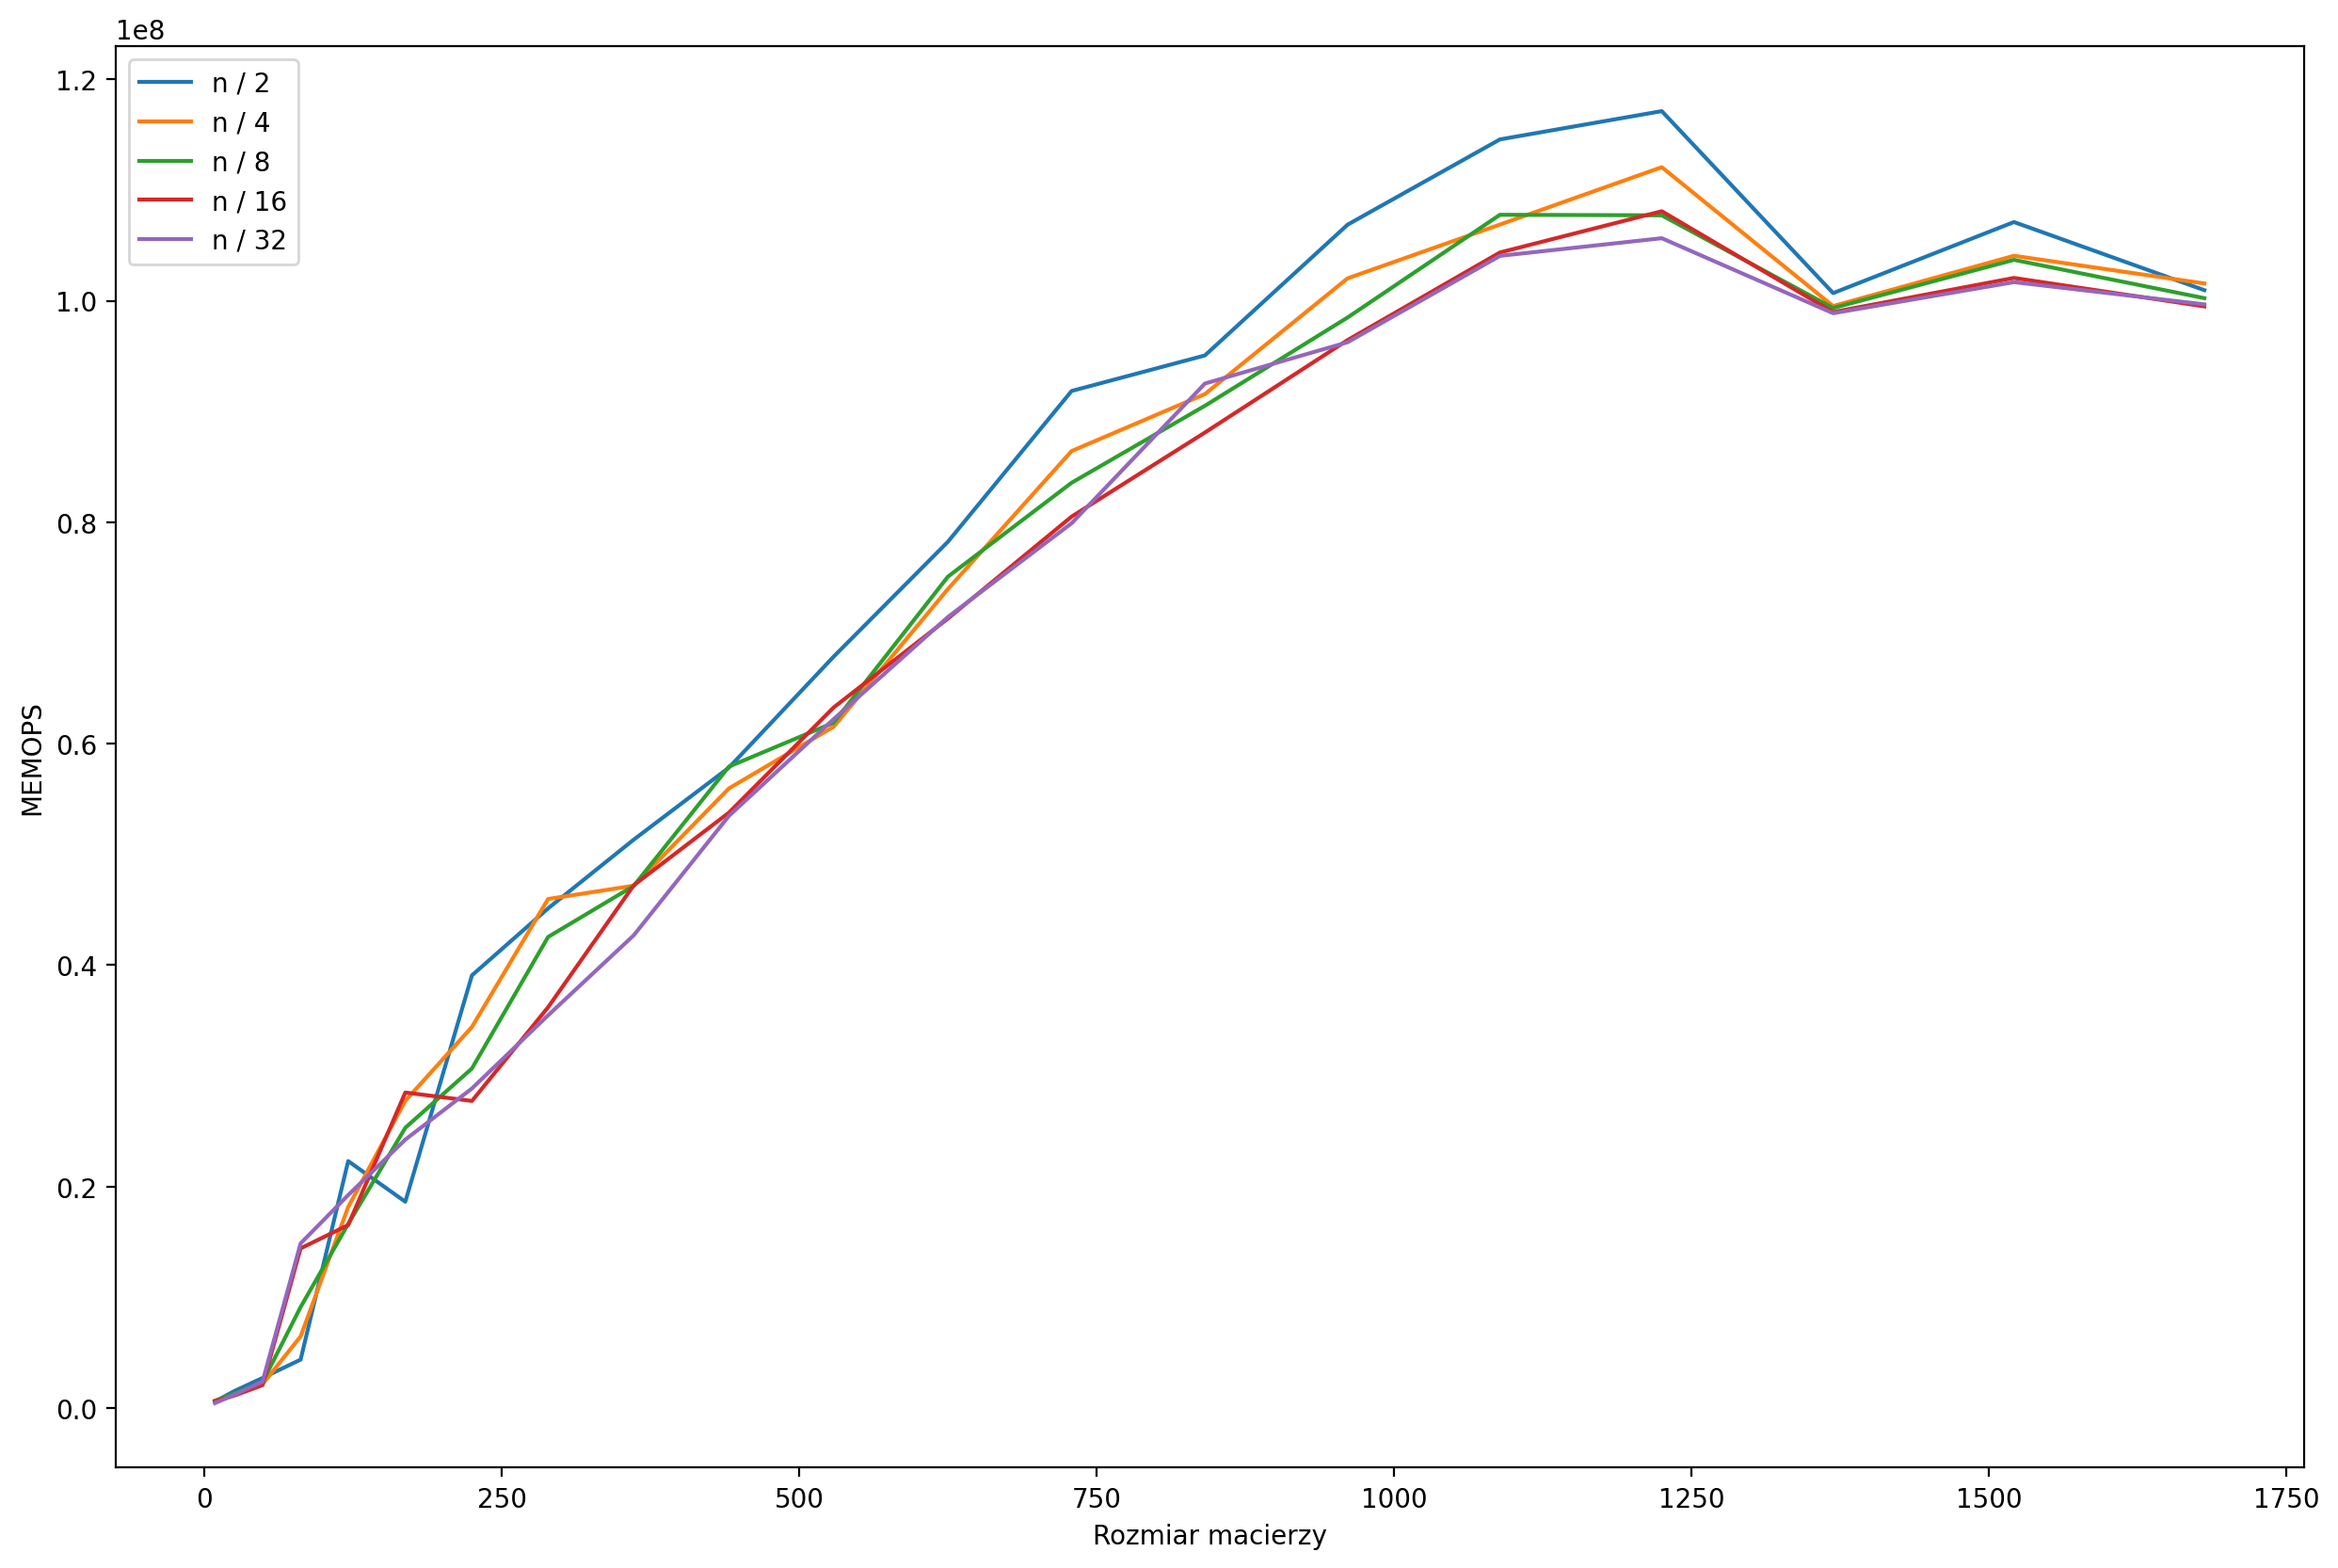

In [35]:
draw_ops('MEMOPS', results, matrices_sizes, 
        lambda n, m: 1 / 3 * (n ** 3 - m ** 3) + 7 / 2 * (n ** 2 - m ** 2) + 7 / 6 * (n - m))

# Ad 3

**Koszt obliczeniowy:**

$$
\sum_{k=0}^{n-m-1} \left[ (n - k) + \sum_{j=k+1}^{n-1} 2 \cdot (n - j + 1) \right] = \\
= \frac{1}{3}n^3 + \frac{3}{2}n^2 - \frac{5}{6}n - \frac{1}{3}m^3 - \frac{3}{2}m^2 + \frac{5}{6}m = \\
= \frac{1}{3}(n^3 - m^3) + \frac{3}{2}(n^2 - m^2) - \frac{5}{6}(n - m)
$$

$\sum_{k=0}^{n-m-1}$ odpowiada pętli z zakresu $(0,  n-m)$ w której dzielimy wektor długości $n - k$  przez stałą, co powoduje koszt $(n-k)$ oraz wykonujemy pętle z zakresu $(k+1, n)$ co odpowiada  $\sum_{j=k+1}^{n-1}$. W pętli wykonujemy operację dzielenia wektora przez stałą oraz operację odejmowania wektorów. Operacja dzielenia i odemowania dają koszty $(n-j+1)$, co sumuje się do $2*(n-j+1)$

**Koszt pamięciowy:**

$$
\sum_{k=0}^{n-m-1} \left[ 4 \cdot (n - k) + 1 + \sum_{j=k+1}^{n-1} 2 \cdot (n - j + 1) + 1 \right] = \\
= \frac{1}{3}n^3 + \frac{7}{2}n^2 + \frac{7}{6}n - \frac{1}{3}m^3 - \frac{7}{2}m^2 - \frac{7}{6}m = \\
= \frac{1}{3}(n^3 - m^3) + \frac{7}{2}(n^2 - m^2) + \frac{7}{6}(n - m)
$$

Koszt pamięciowy został policzony w sposób analogiczny do kosztu obliczeniowego, biorąc pod uwagę odczyty i zapisy.

# Wnioski i spostrzeżenia
- Procedura `Schur_complement` wykonywała się w czasie krótszym niż $5$ sekund dla obu macierzy niezależnie od rozmiaru dopełnienia , dla maksymalnego rozmiaru macierzy IGA: $1024 \times 1024$ oraz macierzy FEM: $1089 \times 1089$.
- Dla macierzy FEM $1681 \times 1681$ najlepszy czas wynosi niecałe $14$ sekund.
- Najlepszy czas wykonania wynosi około $3.5$ sekundy dla każdej macierzy.
- Czas wykonywania procedury rósł sześciennie względem wielkości macierzy.
- Rodzaj macierzy nie miał znacznego wpływu na szybkość działania procedury. `Schur_complement` na macierzy IGA wykonywał się wolniej, jednak tak mała różnica, może być zależna od innych czynników. 
- Dla obu przypadków macierzy najkrótszy czas wykonania `Schur_complement` jest dla $m = \frac{n}{2} $.
- Maksymalna wartość FLOPS i MEMOPS dla obu macierzy jest taka sama. Dla macierzy IGA jest osiągana dla rozmiaru około $900 \times 900$, a dla macierzy FEM dla rozmiaru $1230 \times 1230$, po czym zaczyna spadać.
- Dla $m = \frac{n}{2}$ osiągane są najwyższe wartości FLOPS oraz MEMOPS.